In [49]:
import pandas as pd

sp500 = pd.read_csv("sp500_prepared.csv", parse_dates=["Date"])
news = pd.read_csv("daily_news_sentiment.csv", parse_dates=["Date"])

merged = pd.merge(sp500, news, on="Date", how="inner")

merged.head()

,Date,Open,High,Low,Close,Volume,abs_return,volatility,volatility_next_day,abs_return_next_day,daily_mean_sentiment,news_volume
0,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,0.003408,6.969971,5.239990,0.001259,0.127267,3
1,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,0.001259,5.239990,11.140015,0.004770,-0.542300,1
2,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,0.004770,11.140015,9.170044,0.003910,0.000000,1
3,2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,4.255780e+09,0.000890,7.719971,12.040039,0.006636,-0.177900,1
4,2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,4.170360e+09,0.007359,15.219971,6.609985,0.002426,-0.200950,2


In [50]:
volume_median = merged["news_volume"].median()
merged["news_volume_group"] = "low"
merged.loc[merged["news_volume"] > volume_median, "news_volume_group"] = "high"

merged["sentiment_group"] = "neutral_or_positive"
merged.loc[merged["daily_mean_sentiment"] < 0, "sentiment_group"] = "negative"
merged.loc[merged["daily_mean_sentiment"] == 0, "sentiment_group"] = "neutral"
merged.loc[merged["daily_mean_sentiment"] > 0, "sentiment_group"] = "positive"

In [51]:
merged.sample(5)

,Date,Open,High,Low,Close,Volume,abs_return,volatility,volatility_next_day,abs_return_next_day,daily_mean_sentiment,news_volume,news_volume_group,sentiment_group
2143,2019-06-24,2951.419922,2954.919922,2944.050049,2945.350098,3.136960e+09,0.002057,10.869873,30.510010,0.009641,0.059300,3,low,positive
2729,2021-10-29,4572.870117,4608.080078,4567.589844,4605.379883,4.510200e+09,0.007109,40.490234,25.279785,0.000661,0.122622,9,high,positive
1910,2018-07-10,2788.560059,2795.580078,2786.239990,2793.840088,3.080140e+09,0.001893,9.340088,15.139893,0.002086,0.101329,7,high,positive
2949,2022-09-15,3932.409912,3959.139893,3888.280029,3901.350098,4.441830e+09,0.007898,70.859863,43.869873,0.001963,-0.042930,10,high,negative
3152,2023-07-18,4521.779785,4562.299805,4514.589844,4554.979980,4.090010e+09,0.007342,47.709961,20.950195,0.000405,0.098795,22,high,positive


In [52]:
same_day_by_volume = (merged
                      .groupby("news_volume_group")[["abs_return", "volatility"]]
                      .agg(["mean", "median"]))

next_day_by_volume = (merged
                      .groupby("news_volume_group")[["abs_return_next_day", "volatility_next_day"]]
                      .agg(["mean", "median"]))

In [53]:
same_day_by_sentiment = (merged
                         .groupby("sentiment_group")[["abs_return", "volatility"]]
                         .agg(["mean", "median"]))

next_day_by_sentiment = (merged
                         .groupby("sentiment_group")[["abs_return_next_day", "volatility_next_day"]]
                         .agg(["mean", "median"]))

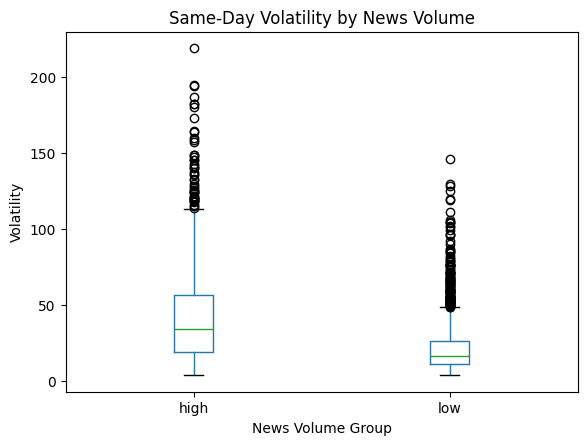

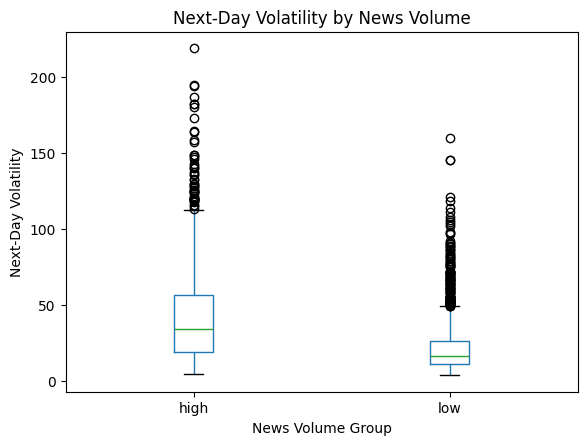

In [54]:
import matplotlib.pyplot as plt

merged.boxplot(
    column="volatility",
    by="news_volume_group",
    grid=False
)
plt.title("Same-Day Volatility by News Volume")
plt.suptitle("")
plt.xlabel("News Volume Group")
plt.ylabel("Volatility")
plt.show()

merged.boxplot(
    column="volatility_next_day",
    by="news_volume_group",
    grid=False
)
plt.title("Next-Day Volatility by News Volume")
plt.suptitle("")
plt.xlabel("News Volume Group")
plt.ylabel("Next-Day Volatility")
plt.show()

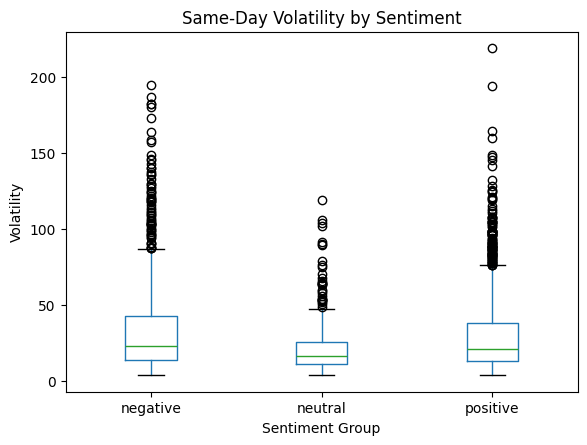

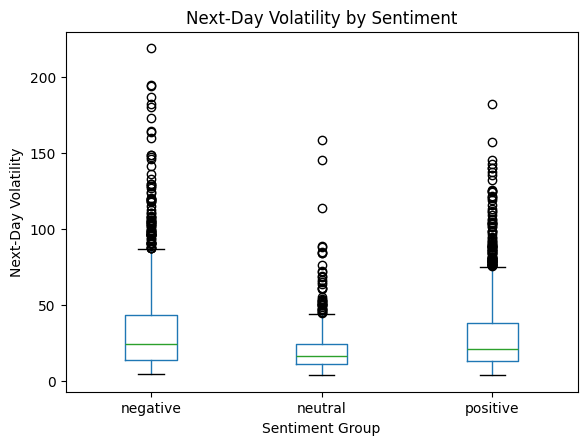

In [55]:
merged.boxplot(
    column="volatility",
    by="sentiment_group",
    grid=False)

plt.title("Same-Day Volatility by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment Group")
plt.ylabel("Volatility")
plt.show()

merged.boxplot(
    column="volatility_next_day",
    by="sentiment_group",
    grid=False
)
plt.title("Next-Day Volatility by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment Group")
plt.ylabel("Next-Day Volatility")
plt.show()

In [56]:
volume_means = (merged
                .groupby("news_volume_group")[[
                    "volatility",
                    "volatility_next_day",
                    "abs_return",
                    "abs_return_next_day"
                    ]]
                .mean())

volume_pct_diff = ((volume_means.loc["high"] - volume_means.loc["low"]) / volume_means.loc["low"]
                   ) * 100

(volume_means, volume_pct_diff)

(                   volatility  volatility_next_day  abs_return  \
 news_volume_group                                                
 high                43.045651            42.742143    0.007320   
 low                 21.625085            21.753095    0.005779   
 
                    abs_return_next_day  
 news_volume_group                       
 high                          0.007066  
 low                           0.005917  ,
 volatility             99.054247
 volatility_next_day    96.487646
 abs_return             26.656778
 abs_return_next_day    19.418355
 dtype: float64)

In [57]:
sentiment_means = (merged
                   .groupby("sentiment_group")[[
                       "volatility",
                       "volatility_next_day",
                       "abs_return",
                       "abs_return_next_day"
                       ]]
                   .mean())

sentiment_means

,volatility,volatility_next_day,abs_return,abs_return_next_day
sentiment_group,,,,
negative,33.398615,34.474571,0.007060,0.007168
neutral,21.216270,20.848246,0.005994,0.005955
positive,29.912577,29.259185,0.006008,0.005932


### Findings/Conclusion

Overall, the results show that both news volume and news sentiment are associated with market volatility, with news volume having the strongest impact. On high news volume days, average same-day volatility was about 43.0, compared to 21.6 on low news days, representing roughly a 99% increase, and next-day volatility showed a similar pattern (42.7 vs 21.8, about a 96% increase). Absolute returns were also larger on high news days, with same-day absolute returns averaging 0.00732 versus 0.00578 on low news days (about 27% higher), and next-day absolute returns remaining higher (0.00707 vs 0.00592, about 19% higher). Sentiment effects were also present but smaller in magnitude. Negative-sentiment days had higher volatility than neutral days both on the same day (33.4 vs 21.2) and the next day (34.5 vs 20.8), while positive-sentiment days showed moderately elevated volatility (29.9 same day vs 29.3 next day). Taken together, these findings suggest that markets react most strongly when there is a large amount of news, especially when the overall sentiment is negative, and that elevated volatility often continues into the following trading day.